# OpenAPS IOB Calculations
----
The code in this notebook will replicate and visualize the IOB calculations used in the [OpenAPS project](https://github.com/openaps/oref0).

Specifically, it will replicate the javascript code found in [`OpenAPS/oref0/lib/iob/calculation.js`](https://github.com/openaps/oref0/blob/master/lib/iob/calculate.js) and plot insulin action curves for a set of Duration of Insulin Activity (`dia`) values.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Coefficients used in estimating the percent of insulin remaining, or (alternatively) the insulin action/decay curve.
# Coeff[0] = alpha * 1
# Coeff[1] = beta1 * x^2
# Coeff[2] = beta2 * x
insulin_action_coeffs = [[1.000000, -0.001852, 0.001852],   # Applied between [0,peak)
                         [0.555560, 0.001323, -0.054233]]   # Applied between [peak,end)
# Source: ?????

In [71]:
def calc_IOB(dia):
    
    # Default to 3 hour Duration of Insulin Activity (dia), 
    # but scale peak and end for longer (or shorter) dia values
    #dia_scaler = dia / 3.0
    #peak = 75 * dia_scaler
    #end = 180 * dia_scaler
    
    peak = 75
    end = 180
    
    print (peak, end)
    
    iob = {} 
    
    for i_min in range(0, int(end)):
        
        i_min = i_min * 3.0 / dia
        
        if (int(i_min) < peak):
            x = (i_min / 5) + 1
            iob_pct = insulin_action_coeffs[0][0] + insulin_action_coeffs[0][1] * x**2 + insulin_action_coeffs[0][2] * x
        elif (int(i_min) < end):
            y = (i_min - peak) / 5
            iob_pct = insulin_action_coeffs[1][0] + insulin_action_coeffs[1][1] * y**2 + insulin_action_coeffs[1][2] * y
        
        iob.update({i_min: iob_pct})
    
    return iob   

In [95]:
dict_of_dfs_by_dia = {}
for dia in range (2, 9):
    #iob_dict = iob_dia_ + str(dia)
    
    dict_of_dfs_by_dia.update({dia : dfs_by_dia.append(pd.DataFrame(list(calc_IOB(dia).items())))})
    
    

75 180
75 180
75 180
75 180
75 180
75 180
75 180


In [100]:
dict_of_dfs_by_dia['2']

KeyError: '2'

In [88]:
iob_dict = pd.DataFrame(list(calc_IOB(5).items())) 

75 180


In [93]:
whos

Variable                Type           Data/Info
------------------------------------------------
calc_IOB                function       <function calc_IOB at 0x0000022DCFD0B730>
df                      dict           n=480
dfs_by_dia              list           n=7
dia                     int            8
end                     int            180
hours                   str            iob_8
insulin_action_coeffs   list           n=2
iob_df                  DataFrame           min   iob_pct\n0    <...>n\n[180 rows x 2 columns]
iob_dia3                dict           n=180
iob_dict                DataFrame               0         1\n0  <...>n\n[180 rows x 2 columns]
my_plot                 AxesSubplot    Axes(0.125,0.125;0.775x0.775)
pd                      module         <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
peak                    int            75
plt                     module         <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>


In [94]:
dfs_by_dia[0]

,0,1
0,0.0,1.000000
1,1.5,0.999278
2,3.0,0.998222
3,4.5,0.996833
4,6.0,0.995111
5,7.5,0.993055
6,9.0,0.990666
7,10.5,0.987943
8,12.0,0.984888
9,13.5,0.981499


In [28]:
iob_df = pd.DataFrame(list(iob_dia3.items())) 

In [36]:
iob_df.columns=("min", "iob_pct")
iob_df.head()

,min,iob_pct
0,0,1.000000
1,1,0.999556
2,2,0.998963
3,3,0.998222
4,4,0.997333


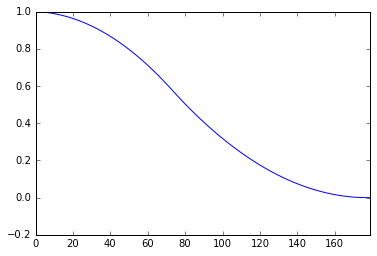

In [38]:
my_plot = iob_df['iob_pct'].plot(kind='line')